<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_10_RFM_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Studi Kasus 10 : RFM Analyst**##

Toko daring **BrightMart**, yang menjual kebutuhan rumah tangga dan gaya hidup, telah
beroperasi selama lima tahun dan mengalami pertumbuhan basis pelanggan yang signifikan
dalam dua tahun terakhir. Namun, meskipun jumlah pelanggan meningkat, pendapatan
perusahaan stagnan. Tim manajemen merasa ada ketidaksesuaian antara pertumbuhan
pelanggan dan hasil keuangan.

**Permasalahan**
  1. **Stagnasi Pendapatan**
      
      Meskipun jumlah pelanggan bertambah, peningkatan pendapatan tidak sejalan.Banyak pelanggan baru hanya melakukan satu kali pembelian, sementara pelanggan
      lama cenderung tidak aktif.

  2. **Tingkat Respons Rendah**

      BrightMart sering mengirimkan email promosi kepada pelanggannya. Namun, tingkat pembukaan email hanya mencapai 12%, dan dari mereka yang membuka, hanya 2% yang benar-benar melakukan pembelian.
  
  3. **Ketergantungan pada Diskon**

      Untuk menarik pembeli, BrightMart sering mengadakan kampanye diskon besar-besaran. Kampanye ini memang mendongkrak penjualan, tetapi margin laba terus menurun akibat besarnya diskon yang diberikan.

  4. **Kurangnya Pemahaman Pelanggan**

      Promosi yang dikirimkan kepada pelanggan bersifat seragam tanpa
      mempertimbangkan preferensi, frekuensi pembelian, atau nilai pelanggan terhadap bisnis. Akibatnya, banyak pelanggan yang merasa promosi tidak relevan, sehingga efektivitas kampanye menurun.


**Goal Perusahaan**

BrightMart ingin:
- Memahami perilaku pelanggan dengan lebih baik untuk mengatasi stagnasi
pendapatan.
- Meningkatkan tingkat respons dan konversi kampanye pemasaran.
- Mengurangi ketergantungan pada diskon besar-besaran sambil tetap mempertahankan daya tarik penawaran.
- Mengimplementasikan strategi segmentasi pelanggan untuk menciptakan
pengalaman belanja yang lebih personal dan relevan.

**Pendekatan**

BrightMart memutuskan untuk menggunakan metode **RFM Analysis** (Recency, Frequency,Monetary) untuk mengelompokkan pelanggannya berdasarkan:
- **Recency**: Seberapa baru pelanggan melakukan pembelian terakhir.
- **Frequency**: Seberapa sering pelanggan melakukan pembelian.
- **Monetary**: Total nilai pembelian pelanggan.

Dengan metode ini, perusahaan berharap dapat mengidentifikasi kelompok pelanggan yang paling bernilai, menentukan pelanggan yang berisiko tidak aktif, dan merancang strategi
pemasaran yang lebih relevan untuk meningkatkan loyalitas serta laba.

Studi ini akan membantu BrightMart menemukan langkah konkret untuk mengoptimalkan strategi pemasaran berbasis data dan meningkatkan performa bisnis secara keseluruhan.

## **Step 01 : Business Problem**##

BrightMart menghadapi beberapa masalah bisnis utama:
1. Stagnasi Pendapatan: Meski jumlah pelanggan bertambah, pertumbuhan
pendapatan tidak sejalan karena banyak pelanggan baru hanya membeli satu kali,
dan pelanggan lama mulai tidak aktif.
2. Tingkat Respons Rendah: Kampanye email promosi memiliki tingkat pembukaan
yang sangat rendah (12%) dan tingkat konversi yang bahkan lebih rendah (2%).
3. Ketergantungan pada Diskon: Penjualan hanya meningkat saat kampanye diskon
besar-besaran, tetapi margin laba menurun akibat strategi ini.
4. Kurangnya Pemahaman Pelanggan: Promosi yang dikirimkan bersifat seragam, tidak memperhitungkan preferensi atau perilaku pelanggan, sehingga membuat kampanye
kurang relevan.

##**Step 02 : Analysis Objective**

Tujuan analisis dalam studi kasus ini adalah:

- Memahami perilaku pelanggan melalui metode **RFM Analysis** untuk menentukan
segmentasi pelanggan berdasarkan kedekatan waktu pembelian (Recency),
frekuensi pembelian (Frequency), dan total nilai pembelian (Monetary).
- Mengidentifikasi pelanggan bernilai tinggi dan pelanggan yang berisiko churn.
- Merancang strategi pemasaran yang lebih relevan, personal, dan berbasis data guna meningkatkan loyalitas pelanggan, mengurangi ketergantungan pada diskon, serta mendorong pertumbuhan pendapatan secara berkelanjutan.

##**Step 03 : Key Questions**

Beberapa pertanyaan kunci yang ingin dijawab melalui analisis ini:

1. **Siapa pelanggan bernilai tinggi?**

  → Agar perusahaan dapat menawarkan produk bernilai lebih tinggi kepada mereka.
2. **Siapa pelanggan yang berisiko churn?**

  → Untuk menargetkan mereka dengan pesan personal yang dapat mencegah
kehilangan pelanggan.
3. **Segmen mana yang paling responsif terhadap promosi?**

  → Untuk menentukan pelanggan yang paling mungkin berinteraksi dengan merek.

##**Step 04 : Data Findings**

In [1]:
import pandas as pd
file_path = "https://drive.google.com/uc?export=download&id=17g2Af8aAoWAXyUlOZfkLTwXf1nZhrufH"
dataset = pd.read_csv(file_path)
dataset.head()


,Customer_ID,Last_Purchase_Date,Total_Purchases,Lifetime_Value
0,C0001,2024-11-24,34,102.132927
1,C0002,2024-05-26,6,443.101304
2,C0003,2023-12-03,30,131.116031
3,C0004,2023-02-02,21,290.045234
4,C0005,2024-07-29,7,321.343772


### **1. Siapa pelanggan bernilai tinggi?**

In [2]:
from datetime import datetime
from IPython.display import display

In [3]:
# Hitung Recency
dataset["Last_Purchase_Date"] = pd.to_datetime(dataset["Last_Purchase_Date"])
dataset["Recency"] = (datetime.now() - dataset["Last_Purchase_Date"]).dt.days

In [4]:
# Buat RFM Score
r_bins = pd.qcut(dataset["Recency"], q=5, labels=[5,4,3,2,1])
f_bins = pd.qcut(dataset["Total_Purchases"], q=5, labels=[5,4,3,2,1])
m_bins = pd.qcut(dataset["Lifetime_Value"], q=5, labels=[5,4,3,2,1])

dataset["R_Score"] = r_bins.astype(int)
dataset["F_Score"] = f_bins.astype(int)
dataset["M_Score"] = m_bins.astype(int)

In [5]:
# Gabungkan RFM Score
dataset["RFM_Score"] = dataset["R_Score"].astype(str) + dataset["F_Score"].astype(str) + dataset["M_Score"].astype(str)

In [6]:
# Identifikasi High-Value Customers
high_value_customers = dataset[dataset["RFM_Score"] == "555"]

In [7]:
# Tampilkan High-Value Customers
def display_dataframe_to_user(name, dataframe):
  print(f"{name}:\n")
  display(dataframe)

display_dataframe_to_user("High-Value Customer (RFM Score: 555)", high_value_customers )

High-Value Customer (RFM Score: 555):



,Customer_ID,Last_Purchase_Date,Total_Purchases,Lifetime_Value,Recency,R_Score,F_Score,M_Score,RFM_Score
167,C0168,2024-12-06,3,90.820028,77,5,5,5,555
225,C0226,2024-08-21,6,84.471606,184,5,5,5,555
232,C0233,2024-10-02,4,77.501664,142,5,5,5,555
241,C0242,2024-11-11,6,102.976293,102,5,5,5,555
337,C0338,2024-12-16,10,24.432716,67,5,5,5,555
591,C0592,2024-09-30,1,51.242428,144,5,5,5,555
672,C0673,2024-10-03,2,74.621002,141,5,5,5,555
786,C0787,2024-09-13,2,102.655447,161,5,5,5,555
816,C0817,2024-07-28,7,90.154043,208,5,5,5,555
834,C0835,2024-11-11,8,74.119193,102,5,5,5,555


Berikut adalah pelanggan bernilai tinggi (dengan RFM Score: 555), yang menunjukkan bahwa mereka:

1. Baru saja melakukan pembelian
2. Sering berbelanja
3. Memiliki total nilai pembelian yang tinggi

In [8]:
import matplotlib.pyplot as plt

# Extracting high-value customers for visualization
high_value_data = high_value_customers[["Recency", "Total_Purchases", "Lifetime_Value"]]

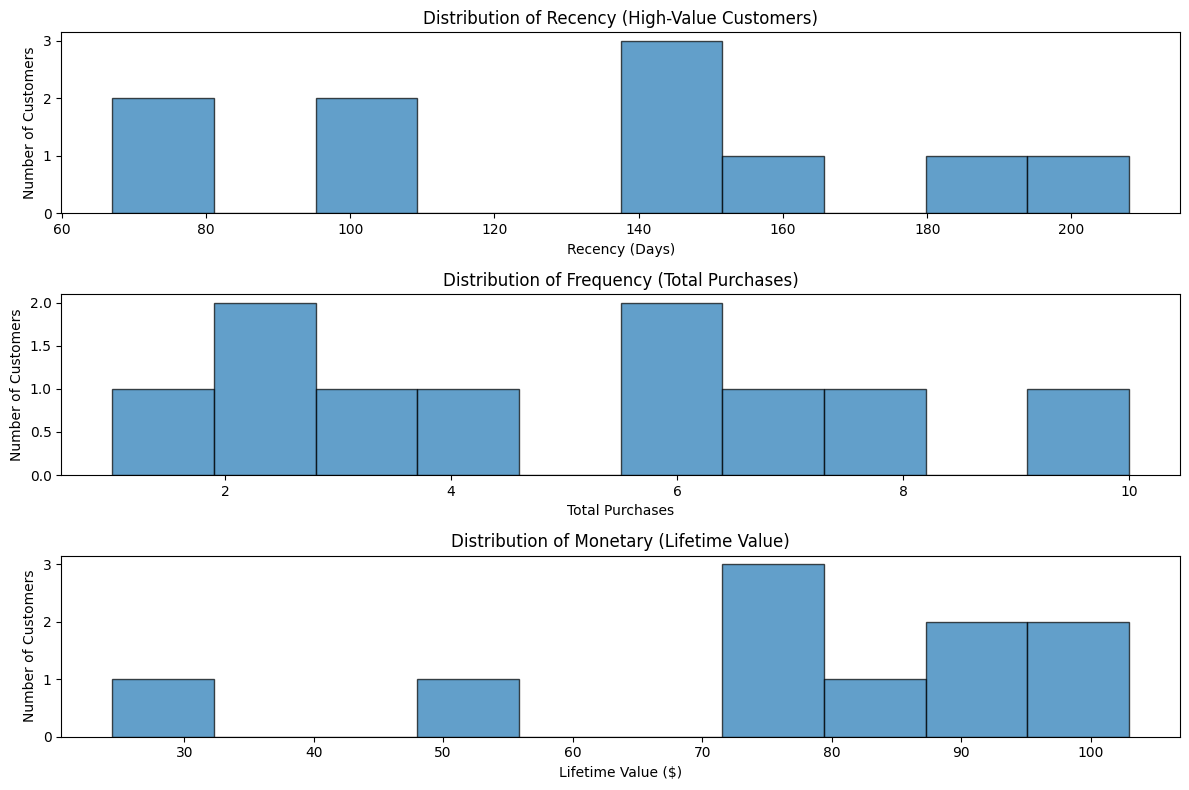

In [9]:
# Plotting the Recency, Frequency, and Monetary distribution
plt.figure(figsize=(12, 8))

# Recency
plt.subplot(3, 1, 1)
plt.hist(high_value_data["Recency"], bins=10, alpha=0.7, edgecolor="black")
plt.title("Distribution of Recency (High-Value Customers)")
plt.xlabel("Recency (Days)")
plt.ylabel("Number of Customers")

# Frequency
plt.subplot(3, 1, 2)
plt.hist(high_value_data["Total_Purchases"], bins=10, alpha=0.7, edgecolor="black")
plt.title("Distribution of Frequency (Total Purchases)")
plt.xlabel("Total Purchases")
plt.ylabel("Number of Customers")

# Monetary
plt.subplot(3, 1, 3)
plt.hist(high_value_data["Lifetime_Value"], bins=10, alpha=0.7, edgecolor="black")
plt.title("Distribution of Monetary (Lifetime Value)")
plt.xlabel("Lifetime Value ($)")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()

**1. Distribusi Recency (High-Value Customers)**

Grafik ini menunjukkan jumlah pelanggan berdasarkan jumlah hari sejak pembelian terakhir mereka.

  **Temuan Utama:**
  - Sebagian besar pelanggan memiliki nilai recency yang lebih tinggi (di atas 100 hari), menunjukkan bahwa mereka tidak melakukan pembelian baru-baru ini.
  - Ini bisa mengindikasikan adanya peluang untuk mengaktifkan kembali pelanggan dengan strategi pemasaran yang lebih agresif, seperti diskon atau kampanye email yang menarik.

**2. Distribusi Frequency (Total Purchases)**

Grafik ini menunjukkan seberapa sering pelanggan melakukan pembelian.

  **Temuan Utama:**
  - Sebagian besar pelanggan hanya melakukan pembelian dalam jumlah terbatas (kurang dari 10 kali).
  - Adanya beberapa pelanggan yang memiliki frekuensi pembelian lebih tinggi (sekitar 6-8 kali), tetapi mereka adalah minoritas.
  - Strategi peningkatan frekuensi pembelian bisa difokuskan pada pelanggan dengan frekuensi sedang untuk mendorong mereka menjadi pelanggan yang lebih loyal.

**3. Distribusi Monetary (Lifetime Value)**

Grafik ini mengilustrasikan distribusi nilai total pembelian pelanggan.

  **Temuan Utama:**
  - Sebagian besar pelanggan memiliki lifetime value yang berkisar antara $70-100.

  - Hanya sedikit pelanggan yang memiliki nilai lifetime value yang lebih rendah (<$50).
  - Strategi upselling dan cross-selling bisa digunakan untuk meningkatkan nilai pembelian pelanggan dengan mendorong mereka ke kategori pembelanja yang lebih tinggi.

**Implikasi Bisnis**

  **1. Aktivasi Kembali Pelanggan (Recency)**
  - Kampanye pemasaran ulang atau diskon khusus bisa diberikan kepada pelanggan yang belum belanja dalam waktu lama untuk meningkatkan retensi mereka.

**2. Meningkatkan Loyalitas (Frequency)**
  - Program loyalitas seperti diskon progresif atau reward untuk pembelian berkala bisa meningkatkan jumlah pembelian per pelanggan.

**3. Maksimalkan Keuntungan (Monetary)**
  - Dengan strategi upselling dan bundling produk, pelanggan dengan nilai lifetime yang rendah dapat didorong untuk meningkatkan pembelanjaan mereka.

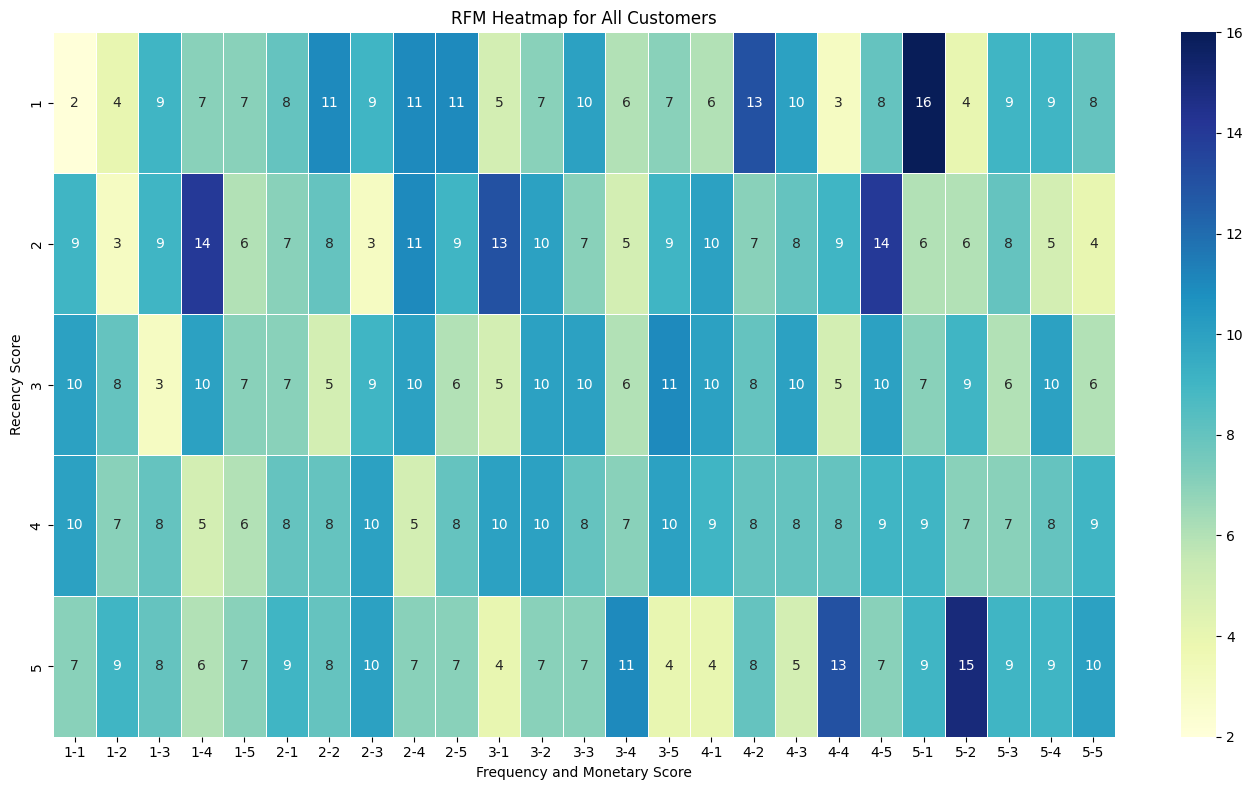

In [10]:
import seaborn as sns

# Create RFM table for all customers
dataset["RFM_Score"] = dataset["R_Score"].astype(str) + dataset["F_Score"].astype(str) + dataset["M_Score"].astype(str)

# Create a heatmap for all RFM Score
rfm_heatmap_all = pd.crosstab(dataset["R_Score"], [dataset["F_Score"], dataset["M_Score"]])

plt.figure(figsize=(14, 8))
sns.heatmap(rfm_heatmap_all, annot=True, fmt="d", cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("RFM Heatmap for All Customers")
plt.xlabel("Frequency and Monetary Score")
plt.ylabel("Recency Score")
plt.tight_layout()
plt.show()

Hasil dari visualisasi Heatmap of RFM Scores (All Customers) menunjukkan distribusi pelanggan berdasarkan kombinasi Recency (R), Frequency (F), dan Monetary (M). Berikut adalah penjelasan rinci:

1.  Sumbu Y: Recency (R)
  - Skor Rendah (1): Pelanggan yang sudah lama tidak berbelanja.
  - Skor Tinggi (5): Pelanggan yang baru saja melakukan pembelian.

  Temuan:
  - Pelanggan dengan skor Recency tinggi (5) menunjukkan potensi besar untuk keterlibatan lebih lanjut karena mereka baru saja berbelanja.
  - Pelanggan dengan skor Recency rendah (1) perlu didekati dengan strategi khusus untuk mengurangi kemungkinan churn.

2. Sumbu X: Kombinasi Frequency (F) dan Monetary (M). Kombinasi Frequency (berapa sering pelanggan berbelanja) dan Monetary (jumlah uang yang dibelanjakan) berada di sumbu X.

  Interpretasi Kombinasi:
  - 1-1: Pelanggan yang jarang membeli dengan nilai pembelian rendah.
  - 5-5: Pelanggan yang sering membeli dengan nilai pembelian tinggi (pelanggan bernilai tinggi).

3. Warna (Jumlah Pelanggan)

  Warna lebih gelap: Menunjukkan lebih banyak pelanggan dalam kombinasi tertentu.

  Temuan:
  - Kombinasi dengan warna gelap menunjukkan segmen pelanggan yang dominan dalam dataset ini.
  - Kombinasi 5-5 (R tinggi, F tinggi, M tinggi) menunjukkan pelanggan terbaik, yaitu pelanggan yang sering dan baru saja berbelanja dengan nilai transaksi tinggi.
  - Kombinasi seperti 1-1 atau 1-2 memiliki lebih sedikit pelanggan, yang mungkin menunjukkan segmen pelanggan yang membutuhkan perhatian atau strategi pemulihan.

** Hasil Utama**
1. Segmen Potensial
  - Pelanggan dengan skor R = 5, F = 5, dan M = 5 (paling gelap di pojok kanan atas) adalah segmen pelanggan terbaik. BrightMart bisa fokus pada mereka dengan program loyalitas atau promosi eksklusif.
2. Segmen Berisiko
  - Pelanggan dengan R = 1 dan kombinasi F dan M rendah perlu didekati untuk strategi retensi atau kampanye "We Miss You".
3. Strategi Berdasarkan Temuan
  - Champions (5-5-5): Beri penawaran eksklusif untuk meningkatkan loyalitas.
  - At Risk (1-X-X): Fokus pada pelanggan lama yang perlu diaktifkan kembali.
  - Promising (3-4-4): Dorong pelanggan potensial untuk menjadi pelanggan terbaik.

###**2. Siapa Pelanggan yang Berisiko Churn?**

**Kriteria Pelanggan yang Berisiko Churn**

**1. Recency Rendah (R = 1 atau 2)**

Alasan:
* Pelanggan yang sudah lama tidak melakukan pembelian menunjukkan penurunan keterlibatan dengan merek.
* Dalam bisnis, semakin lama pelanggan tidak berbelanja, semakin besar kemungkinan mereka telah beralih ke pesaing atau kehilangan minat.

Mengapa Penting?
* Dimensi Recency adalah indikator paling langsung untuk mengukur risiko churn. Pelanggan dengan Recency rendah membutuhkan upaya untuk diaktifkan kembali sebelum churn menjadi permanen.

**2. Frequency Rendah (F = 1 atau 2)**

Alasan:
* Pelanggan dengan frekuensi pembelian rendah menunjukkan hubungan yang lemah dengan bisnis.
* Mereka cenderung hanya melakukan pembelian sesekali atau sporadis, sehingga lebih rentan untuk churn dibandingkan pelanggan dengan frekuensi tinggi.

Mengapa Penting?
* Frequency rendah menunjukkan kurangnya pola keterlibatan yang konsisten. Jika pelanggan seperti ini tidak diberi perhatian, mereka cenderung berhenti sepenuhnya.

**3. Monetary (M Tinggi atau Rendah)**

Alasan:
* Pelanggan dengan Monetary rendah tidak memberikan kontribusi finansial yang signifikan, sehingga prioritas untuk mengaktifkan mereka kembali lebih rendah.
* Pelanggan dengan Monetary tinggi adalah pelanggan bernilai tinggi yang telah memberikan kontribusi besar, tetapi jika Recency dan Frequency mereka rendah, mereka berisiko hilang sebagai aset finansial penting.

Mengapa Penting?
* Fokus pada Monetary tinggi memungkinkan perusahaan memprioritaskan sumber daya untuk pelanggan yang dapat memberikan dampak terbesar pada pendapatan.

**Kombinasi untuk Identifikasi Pelanggan Berisiko Churn**
* R Rendah (R = 1 atau 2): Pelanggan sudah lama tidak aktif.
* F Rendah (F = 1 atau 2): Pelanggan jarang melakukan pembelian.
* Prioritaskan M Tinggi: Untuk pelanggan bernilai besar yang perlu diaktifkan kembali dengan cepat.

**Kesimpulan**

Kriteria ini digunakan karena:

1. Mereka memberikan indikator langsung tentang ketidakaktifan pelanggan.
2. Dimensi Recency adalah sinyal awal potensi churn, sementara Frequency dan Monetary membantu memprioritaskan tindakan.
3. Analisis ini memungkinkan perusahaan mengidentifikasi pelanggan yang berisiko sebelum mereka benar-benar hilang, sehingga langkah intervensi (seperti kampanye retensi) dapat diambil secara proaktif.

In [11]:
# Define criteria for customers at risk of churn
# R = 1 or 2 (low Recency), F = 1 or 2 (low Frequency)
churn_risk_customers = dataset[(dataset["R_Score"] <=2) & (dataset["F_Score"] <= 2)]

In [12]:
# Sort the result by Monetary Score to prioritize high-value customers at risk
churn_risk_customers = churn_risk_customers.sort_values(by="M_Score", ascending=False)

In [13]:
# Display the results to the user
def display_dataframe_to_user(name, dataframe):
  print(f"{name}:\n")
  display(dataframe)

display_dataframe_to_user("Churn Risk Customers", churn_risk_customers)

Churn Risk Customers:



,Customer_ID,Last_Purchase_Date,Total_Purchases,Lifetime_Value,Recency,R_Score,F_Score,M_Score,RFM_Score
492,C0493,2023-03-27,35,53.460163,697,1,2,5,125
181,C0182,2023-04-11,36,109.269876,682,1,2,5,125
242,C0243,2023-01-03,39,46.194611,780,1,2,5,125
244,C0245,2023-02-25,49,54.638022,727,1,1,5,115
247,C0248,2023-06-28,38,108.789352,604,2,2,5,225
...,...,...,...,...,...,...,...,...,...
616,C0617,2023-08-19,46,470.609545,552,2,1,1,211
837,C0838,2023-02-11,38,474.374534,741,1,2,1,121
812,C0813,2023-08-26,37,477.536450,545,2,2,1,221
677,C0678,2023-08-15,40,467.110521,556,2,2,1,221


###**3. Segmen mana yang paling responsif terhadap promosi?**

Kriteria untuk Segmen Responsif terhadap Promosi

**1. Recency Tinggi (R = 4 atau 5)**

Pelanggan yang baru-baru ini melakukan pembelian lebih cenderung responsif terhadap promosi karena mereka masih memiliki hubungan aktif dengan bisnis.

**2. Frequency Tinggi (F = 4 atau 5)**

Pelanggan yang sering melakukan pembelian menunjukkan keterlibatan yang kuat, sehingga mereka lebih mungkin merespons promosi.

**3. Monetary Bervariasi**

Pelanggan dengan nilai Monetary tinggi memberikan potensi dampak finansial lebih besar ketika mereka merespons promosi.

**Alasan Kriteria Tersebut**
1. Recency Tinggi: Pelanggan yang baru saja berbelanja lebih mudah terhubung dengan merek karena mereka masih memiliki pengalaman belanja yang segar.
2. Frequency Tinggi: Pelanggan yang sering berbelanja cenderung memiliki pola keterlibatan yang stabil dan lebih mungkin terpengaruh oleh penawaran.
3. Monetary Bervariasi: Pelanggan dengan Monetary tinggi sering kali dianggap sebagai prioritas, tetapi Monetary yang rendah atau sedang tetap penting untuk diaktifkan kembali atau diubah menjadi pelanggan bernilai tinggi.

In [14]:
# Define criteria for customers most responsive to promotions
# R = 4 or 5 (high Recency), F = 4 or 5 (high Frequency)
responsive_customers = dataset[(dataset["R_Score"] >=4) & (dataset["F_Score"] >=4)]

In [15]:
# Sort by Monetary Score to prioritize high-value customers
responsive_customers = responsive_customers.sort_values(by="M_Score", ascending=False)

In [16]:
# Display the results to the user
display_dataframe_to_user("Most Responsive Customers to Promotions", responsive_customers)

Most Responsive Customers to Promotions:



,Customer_ID,Last_Purchase_Date,Total_Purchases,Lifetime_Value,Recency,R_Score,F_Score,M_Score,RFM_Score
570,C0571,2024-03-10,9,43.099891,348,4,5,5,455
167,C0168,2024-12-06,3,90.820028,77,5,5,5,555
698,C0699,2024-05-03,19,38.509546,294,4,4,5,445
672,C0673,2024-10-03,2,74.621002,141,5,5,5,555
223,C0224,2024-08-13,20,80.689869,192,5,4,5,545
...,...,...,...,...,...,...,...,...,...
759,C0760,2024-06-21,11,493.444914,245,4,4,1,441
521,C0522,2024-03-19,1,496.009808,339,4,5,1,451
512,C0513,2024-02-26,18,411.566891,361,4,4,1,441
293,C0294,2024-07-27,5,454.637442,209,5,5,1,551


In [17]:
# Define customer segments based on RFM scores
def segment_customer(row):
    if row["R_Score"] == 5 and row["F_Score"] == 5 and row["M_Score"] == 5:
        return 'Champions'
    elif row["R_Score"] >= 4 and row["F_Score"] >= 4:
        return 'Loyal Customers'
    elif row["R_Score"] <= 2 and row["F_Score"] >= 4:
        return 'At Risk'
    elif row["R_Score"] <= 2 and row["F_Score"] <= 2:
        return 'Hibernating'
    elif row["R_Score"] >= 3 and row["F_Score"] <= 2:
        return "Promising"
    else:
        return "Others"

In [18]:
# Apply the function to segment customers
dataset["Segment"] = dataset.apply(segment_customer, axis=1)

In [19]:
# Count the number of customers in each segment
segment_counts = dataset["Segment"].value_counts().reset_index()
segment_counts.columns = ["Segment", "Customer Count"]

In [20]:
# Display the segmentation result to the user
display_dataframe_to_user("Customer Segmentation", segment_counts)

Customer Segmentation:



,Segment,Customer Count
0,Others,280
1,Promising,228
2,At Risk,163
3,Loyal Customers,161
4,Hibernating,158
5,Champions,10


Segmentasi pelanggan berdasarkan analisis RFM telah selesai. Berikut adalah hasilnya:

1. Champions: Pelanggan terbaik dengan skor tertinggi di semua dimensi.
2. Loyal Customers: Pelanggan setia yang sering dan baru saja berbelanja.
3. At Risk: Pelanggan bernilai tinggi tetapi sudah lama tidak aktif.
4. Hibernating: Pelanggan jarang aktif dan berisiko tinggi churn.
5. Promising: Pelanggan dengan potensi untuk menjadi pelanggan bernilai tinggi.

In [21]:
# Include the segmentation column into the dataset
display_dataframe_to_user("Dataset With Customer Segment", dataset)

Dataset With Customer Segment:



,Customer_ID,Last_Purchase_Date,Total_Purchases,Lifetime_Value,Recency,R_Score,F_Score,M_Score,RFM_Score,Segment
0,C0001,2024-11-24,34,102.132927,89,5,2,5,525,Promising
1,C0002,2024-05-26,6,443.101304,271,4,5,1,451,Loyal Customers
2,C0003,2023-12-03,30,131.116031,446,3,3,4,334,Others
3,C0004,2023-02-02,21,290.045234,750,1,3,3,133,Others
4,C0005,2024-07-29,7,321.343772,207,5,5,2,552,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...
995,C0996,2023-02-27,49,152.066044,725,1,1,4,114,Hibernating
996,C0997,2024-10-04,35,391.610740,140,5,2,2,522,Promising
997,C0998,2024-07-13,27,165.339423,223,4,3,4,434,Others
998,C0999,2024-09-02,6,228.860903,172,5,5,4,554,Loyal Customers


##**Step 05: Business Implication**

1. Stagnasi Pendapatan

  Implikasi:
  * Revenue Plateau: Pertumbuhan basis pelanggan tidak diterjemahkan menjadi peningkatan pendapatan, menunjukkan adanya celah dalam monetisasi pelanggan baru.
  * Biaya Akuisisi Pelanggan yang Tidak Efisien: BrightMart mungkin menghabiskan banyak biaya untuk mendapatkan pelanggan baru tanpa memastikan bahwa mereka terus melakukan pembelian.



2. Tingkat Respons Rendah terhadap Promosi

  Implikasi:
  * Kampanye Tidak Efektif: Tingkat pembukaan email dan konversi yang rendah menunjukkan bahwa pesan promosi tidak relevan dengan kebutuhan atau preferensi pelanggan.
  * Efisiensi Biaya Rendah: Investasi dalam kampanye promosi tidak memberikan ROI yang optimal.



3. Ketergantungan pada Diskon

  Implikasi:
  * Margin Keuntungan Tertekan: Diskon besar-besaran mendorong volume penjualan tetapi mengurangi margin laba.
  * Pelanggan Tidak Loyal: Pelanggan cenderung hanya membeli saat ada diskon, menciptakan hubungan transaksional daripada emosional dengan merek.



4. Kurangnya Pemahaman Pelanggan

  Implikasi:
  * Promosi Tidak Efektif: Promosi seragam membuat pelanggan merasa tidak diperhatikan secara individual.
  * Peluang Terlewatkan: Tanpa pemahaman yang baik tentang pelanggan, BrightMart kehilangan peluang untuk menjual produk yang relevan kepada segmen yang tepat.



5. Peluang yang Dapat Dimanfaatkan

  Loyalitas Pelanggan:
  * Pelanggan dengan nilai Recency dan Frequency tinggi dapat diubah menjadi pendukung merek melalui penawaran eksklusif dan program loyalitas.
  * Upselling: Pelanggan dengan nilai Monetary tinggi memiliki potensi untuk membeli produk premium.



**Risiko yang Harus Diperhatikan**

1. Churn Pelanggan Bernilai Tinggi: Jika pelanggan bernilai tinggi tidak dirawat, BrightMart berisiko kehilangan pendapatan yang signifikan.

2. Kompetisi Harga: Ketergantungan pada diskon dapat menyebabkan BrightMart kalah dalam persaingan dengan pemain yang lebih agresif di pasar.

3. Investasi dalam Data yang Tidak Dimanfaatkan: Mengumpulkan data tanpa menggunakan analitik yang tepat dapat menghamburkan sumber daya.


##**Step 06 : Recommendations**

1. Tingkatkan Loyalitas Pelanggan

  Rekomendasi:
  * Program Loyalitas: Buat program loyalitas dengan poin hadiah, diskon eksklusif, atau akses prioritas ke produk baru untuk pelanggan segmen "Champions" dan "Loyal Customers."
  * Personalized Thank-You Campaigns: Kirimkan pesan penghargaan personal kepada pelanggan setia setelah pembelian besar.



2. Retensi Pelanggan Berisiko Churn

  Rekomendasi:
  * Kampanye "We Miss You": Kirimkan pesan personal kepada pelanggan yang lama tidak aktif dengan insentif untuk kembali, seperti diskon bersyarat atau rekomendasi produk yang relevan.
  * Survei Pemahaman: Lakukan survei untuk memahami alasan mengapa pelanggan berhenti berbelanja dan gunakan hasilnya untuk menyesuaikan strategi.



3. Kurangi Ketergantungan pada Diskon

  Rekomendasi:
  * Bundling Produk: Tawarkan paket produk dengan nilai tambah (bundling) untuk meningkatkan penjualan tanpa mengurangi margin.
  * Promosi Eksklusif Non-Diskon: Berikan penawaran seperti pengiriman gratis, hadiah kecil, atau akses awal ke produk baru sebagai alternatif dari diskon besar.



4. Optimalisasi Promosi Berdasarkan Segmentasi

  Rekomendasi:
  * Promosi Bertarget: Gunakan segmentasi RFM untuk membuat kampanye yang lebih relevan, misalnya:
  * Champions: Tawarkan akses eksklusif ke produk baru atau acara pelanggan.
  * Promising: Berikan insentif untuk meningkatkan keterlibatan mereka.
  * Automated Email Marketing: Implementasikan sistem email otomatis berdasarkan data Recency, seperti penawaran produk segera setelah pembelian.
